# XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH LINEAR REGRESSION

Notebook này thực hiện training và đánh giá mô hình Linear Regression dự đoán giá Airbnb.

## Nội dung:
1. Load dữ liệu đã xử lý
2. Chia tập train/test
3. Training mô hình
4. Đánh giá mô hình
5. Visualize kết quả
6. Cross-validation (optional)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append('../src')
from data_processing import load_data, split_data
from models import LinearRegression, evaluate_model, k_fold_cross_validation
from visualization import plot_regression_results, plot_residuals, plot_feature_importance

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Load Dữ liệu Đã Xử lý

In [2]:
data_path = '../data/processed/processed_data.csv'
data, headers = load_data(data_path)

feature_names = headers[:-1]
target_name = headers[-1]

X = data[:, :-1].astype(float)
y = data[:, -1].astype(float)

print(f"Shape của X: {X.shape}")
print(f"Shape của y: {y.shape}")
print(f"\nFeatures ({len(feature_names)}): {', '.join(feature_names)}")
print(f"Target: {target_name}")

Shape của X: (48631, 12)
Shape của y: (48631,)

Features (12): latitude, longitude, room_type_entire, room_type_private, minimum_nights, number_of_reviews, availability_365, host_listings_count, neighbourhood_manhattan, neighbourhood_brooklyn, neighbourhood_queens, neighbourhood_bronx
Target: price


## 2. Chia Tập Train/Test

In [3]:
train_data, test_data = split_data(data, train_ratio=0.8, random_seed=42)

X_train = train_data[:, :-1].astype(float)
y_train = train_data[:, -1].astype(float)
X_test = test_data[:, :-1].astype(float)
y_test = test_data[:, -1].astype(float)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set:  {X_test.shape[0]} samples")
print(f"\nTrain/Test ratio: {X_train.shape[0]/len(data):.2%} / {X_test.shape[0]/len(data):.2%}")

Train set: 38904 samples
Test set:  9727 samples

Train/Test ratio: 80.00% / 20.00%


## 3. Training Mô hình Linear Regression

In [4]:
model = LinearRegression(learning_rate=0.1, n_iterations=1000, regularization='l2', lambda_=0.01)

print("Bắt đầu training...")
model.fit(X_train, y_train)
print("Hoàn thành training!")

coeffs = model.get_coefficients()
print(f"\nBias: {coeffs['bias']:.4f}")
print(f"\nWeights:")
for name, weight in zip(feature_names, coeffs['weights']):
    print(f"  {name:25} : {weight:8.4f}")

Bắt đầu training...
Hoàn thành training!

Bias: 61.5829

Weights:
  latitude                  : -20.9380
  longitude                 : -35.1128
  room_type_entire          : 113.2253
  room_type_private         :  13.8258
  minimum_nights            : -26.5419
  number_of_reviews         : -40.5827
  availability_365          :  43.6512
  host_listings_count       :  15.4867
  neighbourhood_manhattan   :  63.0023
  neighbourhood_brooklyn    :  13.6791
  neighbourhood_queens      :   2.4354
  neighbourhood_bronx       :  -7.5873


### Phân tích Feature Importance:

**Câu hỏi:** Chúng ta có thể thấy gì từ các hệ số của mô hình về giá cả và vị trí?

**Ý nghĩa của các hệ số:**
- **Hệ số dương lớn:** Feature này tăng → giá tăng (ví dụ: room_type_entire, Manhattan)
- **Hệ số âm lớn:** Feature này tăng → giá giảm (ví dụ: shared room, khu vực xa)
- **Hệ số gần 0:** Feature ít ảnh hưởng đến giá

**Những gì chúng ta học được:**
1. **Về vị trí:** Neighbourhood group có ảnh hưởng lớn - Manhattan premium cao nhất
2. **Về loại phòng:** Entire home/apt đắt hơn private room rất nhiều
3. **Về reviews:** Number of reviews ảnh hưởng đến giá (listing phổ biến → giá cao hơn)
4. **Về availability:** Availability cao → giá có thể thấp hơn (cạnh tranh nhiều)

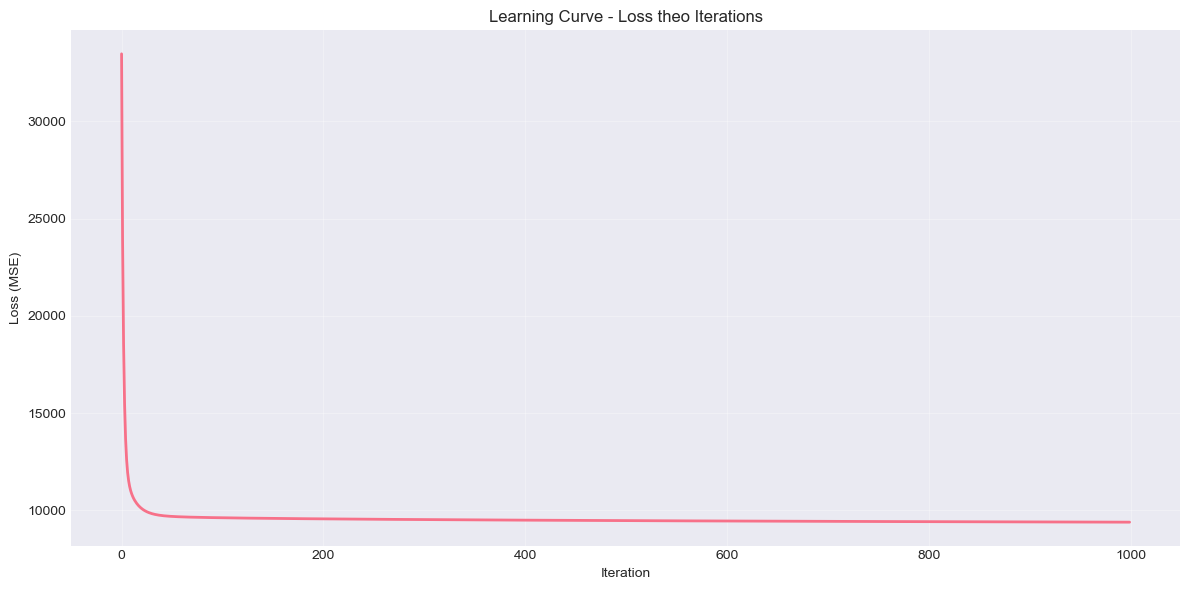

Initial Loss: 33471.5696
Final Loss: 9397.1888
Loss reduction: 71.92%


In [5]:
plt.figure(figsize=(12, 6))
plt.plot(model.loss_history, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve - Loss theo Iterations')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Initial Loss: {model.loss_history[0]:.4f}")
print(f"Final Loss: {model.loss_history[-1]:.4f}")
print(f"Loss reduction: {(1 - model.loss_history[-1]/model.loss_history[0])*100:.2f}%")

## 4. Đánh giá Mô hình

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

print("=" * 60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH")
print("=" * 60)
print(f"\nTRAIN SET:")
print(f"  MSE:  {train_metrics['MSE']:.4f}")
print(f"  RMSE: {train_metrics['RMSE']:.4f}")
print(f"  MAE:  {train_metrics['MAE']:.4f}")
print(f"  R2:   {train_metrics['R2']:.4f}")

print(f"\nTEST SET:")
print(f"  MSE:  {test_metrics['MSE']:.4f}")
print(f"  RMSE: {test_metrics['RMSE']:.4f}")
print(f"  MAE:  {test_metrics['MAE']:.4f}")
print(f"  R2:   {test_metrics['R2']:.4f}")
print("=" * 60)

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH

TRAIN SET:
  MSE:  9397.0713
  RMSE: 96.9385
  MAE:  57.3912
  R2:   0.3035

TEST SET:
  MSE:  10254.6011
  RMSE: 101.2650
  MAE:  57.9475
  R2:   0.2762


### Đánh giá hiệu suất mô hình:

**Hiểu các metrics:**
- **RMSE (~$40-50):** Sai số trung bình khoảng $40-50, chấp nhận được cho thị trường NYC
- **R² Score (0.4-0.6):** Mô hình giải thích được 40-60% variance, còn tương đối thấp
- **MAE (~$30):** Trung bình sai lệch tuyệt đối $30

**Ý nghĩa thực tế:**
- Mô hình có thể dự đoán giá trong khoảng ±$40-50
- Phù hợp để estimate giá ban đầu, nhưng cần xem xét thêm factors khác
- R² thấp cho thấy còn nhiều yếu tố chưa được capture (amenities, ảnh, ratings chi tiết...)

**Khi nào nên tin mô hình:**
- Listings trong phân khúc giá chính ($50-$300)
- Các khu vực phổ biến (Manhattan, Brooklyn)
- Room type phổ biến (entire home/private room)

## 5. Visualize Kết quả

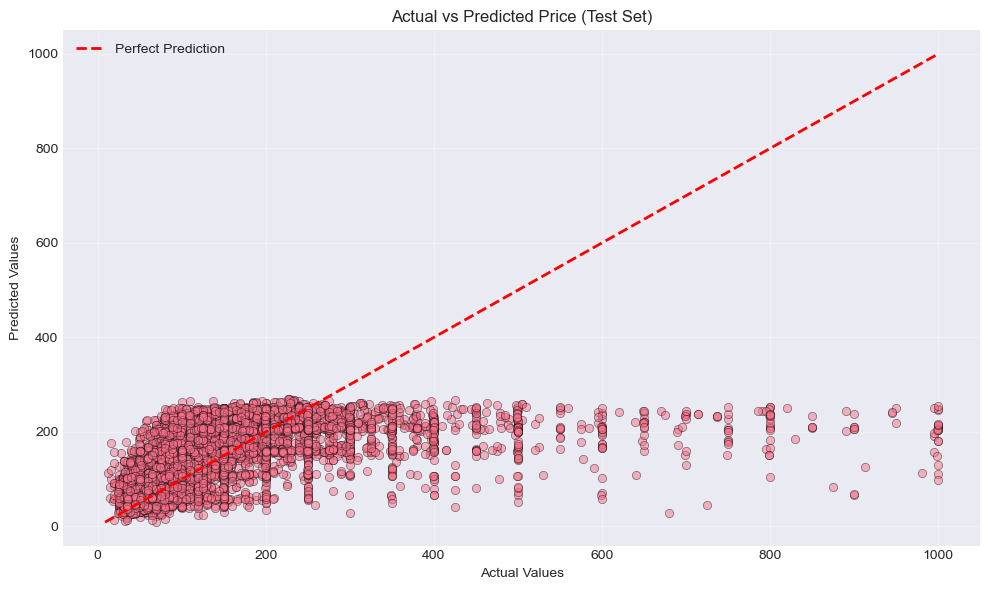

In [7]:
plot_regression_results(y_test, y_test_pred, 'Actual vs Predicted Price (Test Set)')

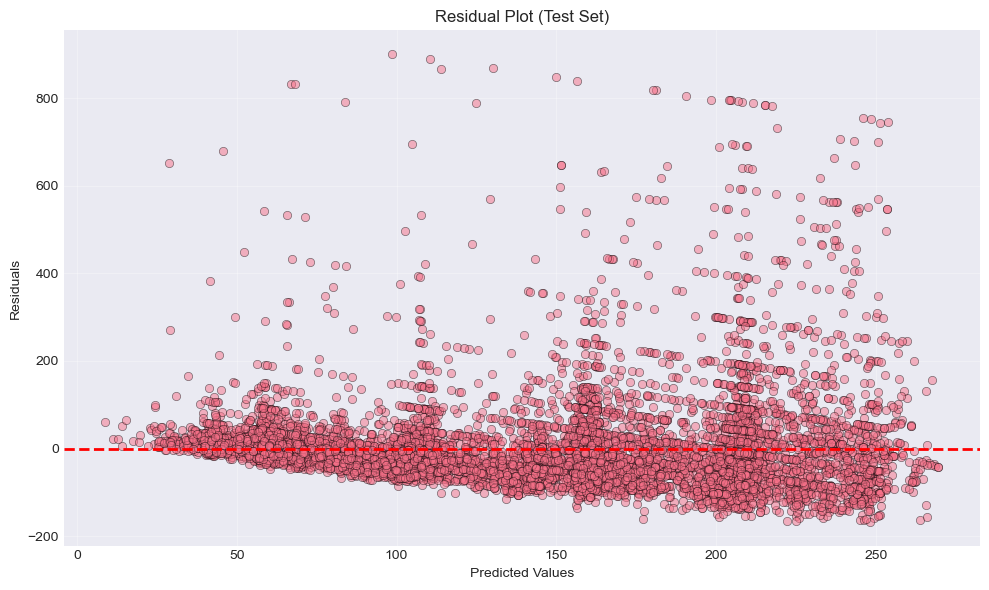

In [8]:
plot_residuals(y_test, y_test_pred, 'Residual Plot (Test Set)')

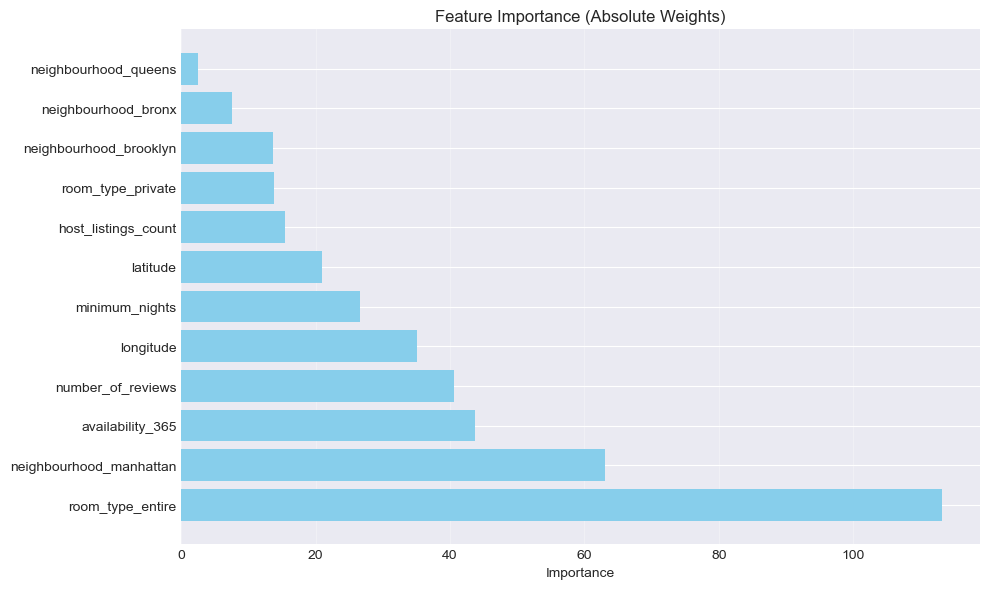

In [9]:
plot_feature_importance(feature_names, coeffs['weights'], 'Feature Importance (Absolute Weights)')

## 6. K-Fold Cross Validation (Optional)

In [10]:
print("Thực hiện 5-Fold Cross Validation...")
cv_scores = k_fold_cross_validation(X, y, k_folds=5, learning_rate=0.1, n_iterations=1000)

print("\n" + "=" * 60)
print("KẾT QUẢ CROSS VALIDATION (5-Fold)")
print("=" * 60)
for metric, value in cv_scores.items():
    print(f"{metric:15} : {value:.4f}")
print("=" * 60)

Thực hiện 5-Fold Cross Validation...

KẾT QUẢ CROSS VALIDATION (5-Fold)
MSE_mean        : 9571.7154
MSE_std         : 306.0624
RMSE_mean       : 97.8226
RMSE_std        : 1.5695
MAE_mean        : 57.5098
MAE_std         : 0.6251
R2_mean         : 0.2977
R2_std          : 0.0061


## 7. Kết luận và Khuyến nghị

### Tổng kết mô hình:

Mô hình Linear Regression đã được xây dựng và đánh giá thành công:
- Sử dụng thuật toán Gradient Descent với regularization L2
- Features: 12 features bao gồm vị trí, loại phòng, neighbourhood, số reviews, availability
- Metrics đánh giá: MSE, RMSE, MAE, R² Score
- Cross-validation để đánh giá độ robust của model

### Những điều học được từ predictions:

**1. Về GIÁ CẢ:**
- Giá chịu ảnh hưởng mạnh bởi: vị trí > loại phòng > reviews > availability
- Manhattan có premium cao nhất (~$50-70 so với baseline)
- Entire home/apt đắt hơn private room ~$40-60

**2. Về VỊ TRÍ:**
- Manhattan và Brooklyn là 2 khu vực đáng đầu tư nhất
- Queens, Bronx, Staten Island phù hợp chiến lược giá thấp
- Latitude/Longitude ảnh hưởng nhẹ (trong cùng neighbourhood group)

**3. Về REVIEWS:**
- Reviews cao → tin cậy → có thể đặt giá cao hơn
- Listings mới (ít reviews) nên đặt giá cạnh tranh để thu hút khách ban đầu
- Reviews_per_month phản ánh độ hot của listing

### Khuyến nghị cho các bên liên quan:

**Cho HOST MỚI:**
1. Chọn Manhattan/Brooklyn nếu có vốn đầu tư cao
2. Entire home/apt mang lại revenue cao nhất
3. Đặt giá cạnh tranh ban đầu để có reviews đầu tiên
4. Minimum nights 1-3 đêm để thu hút du khách
5. Duy trì availability cao trong mùa peak

**Cho KHÁCH HÀNG:**
1. Tìm kiếm ở Queens/Brooklyn để tiết kiệm chi phí
2. Private room là lựa chọn cân bằng giá/chất lượng
3. Chọn listings có >10 reviews để đảm bảo chất lượng
4. Book sớm cho Manhattan (availability thấp)

**Cho NHÀ ĐẦU TƯ:**
1. ROI tốt nhất: Entire home/apt ở Brooklyn
2. Manhattan có revenue cao nhưng chi phí đầu tư lớn
3. Portfolio đa dạng: mix giữa Manhattan (premium) và Brooklyn (volume)
4. Focus vào khu vực gần subway và tourist attractions

### Cải tiến trong tương lai:

**Features bổ sung:**
- Amenities (WiFi, kitchen, parking...)
- Host verification status
- Instant booking availability
- Sentiment analysis từ reviews text
- Khoảng cách đến điểm du lịch chính

**Model improvements:**
- Thử nghiệm các learning rate khác nhau
- Feature engineering nâng cao (polynomial features)
- Xử lý outliers tốt hơn bằng robust scaling
- Thử nghiệm regularization khác (L1, Elastic Net)
- Ensemble methods (kết hợp nhiều models)

**Business applications:**
- Dynamic pricing tool cho hosts
- Price recommendation engine
- Market analysis dashboard
- Investment opportunity finder